# Introduction

## Finding Key Connectors

In [34]:
users = [
    {'id': 0 , 'name': 'Hero'},
    {'id': 1 , 'name': 'Dunn'},
    {'id': 2 , 'name': 'Sue'},
    {'id': 3 , 'name': 'Chi'},
    {'id': 4 , 'name': 'Thor'},
    {'id': 5 , 'name': 'Clive'},
    {'id': 6 , 'name': 'Hicks'},
    {'id': 7 , 'name': 'Devin'},
    {'id': 8 , 'name': 'Kate'},
    {'id': 9 , 'name': 'Klein'},
]

In [69]:
friendship_pairs = [(0,1), (0,2), (1,2), (1,3), (2,3), (3,4), (4,5), (5,6), (5,7), (6,8), (7,8), (8,9)]

In [70]:
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

g1 = nx.DiGraph()

for node in users:
    g1.add_node(user['id'])

for s, t in friendship_paris:
    g1.add_edge(s,t)

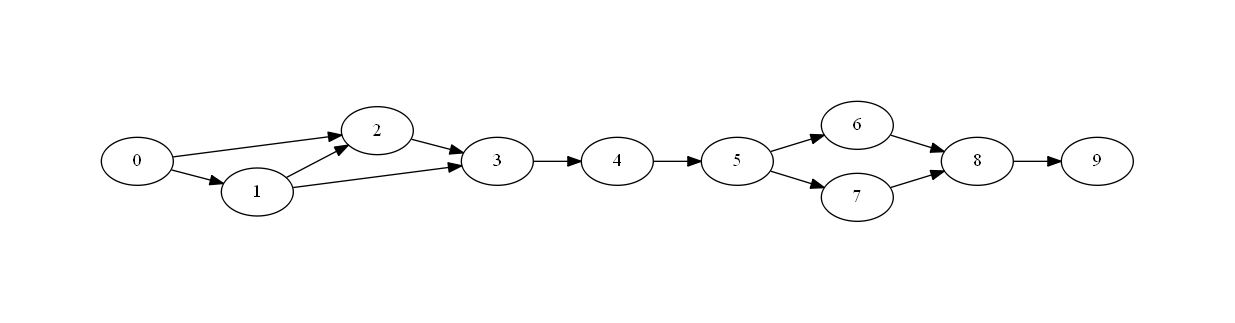

In [71]:
from IPython.core.display import Image
from networkx.drawing.nx_pydot import to_pydot

d1 = to_pydot(g1)
#d1.set_dpi(600)
d1.set_rankdir("LR")
d1.set_margin(1)
Image(d1.create_png())

In [72]:
friendships = {user['id']: [] for user in users}

In [73]:
for s, t in friendship_pairs:
    friendships[s].append(t)
    friendships[t].append(s)

In [74]:
 def number_of_friends(user):
        user_id = user['id']
        friend_ids = friendships[user_id]
        return len(friend_ids)

In [75]:
total_connections = sum(number_of_friends(user) for user in users)
print(total_connections)

24


In [76]:
num_users = len(users)
print(num_users)

avg_connections = total_connections / num_users
print(avg_connections)

10
2.4


In [77]:
num_friends_by_id = [(user['id'], number_of_friends(user)) for user in users]

In [78]:
num_friends_by_id

[(0, 2),
 (1, 3),
 (2, 3),
 (3, 3),
 (4, 2),
 (5, 3),
 (6, 2),
 (7, 2),
 (8, 3),
 (9, 1)]

In [79]:
num_friends_by_id.sort(key=lambda id_and_friends: id_and_friends[1], reverse=True)

In [80]:
num_friends_by_id

[(1, 3),
 (2, 3),
 (3, 3),
 (5, 3),
 (8, 3),
 (0, 2),
 (4, 2),
 (6, 2),
 (7, 2),
 (9, 1)]

## Data Scientists you may know

In [100]:
def foaf_ids_bad(user):
    return [foaf_id for friend_id in friendships[user['id']] for foaf_id in friendships[friend_id]]

In [101]:
set(foaf_ids_bad(users[0])) -  set(friendships[0]) - set([0]) #foaf - friend of user 0 - user 0

{3}

In [106]:
from collections import Counter
def friends_of_friends(user):
    user_id = user['id']
    return Counter(
        foaf_id
        for friend_id in friendships[user_id]
        for foaf_id in friendships[friend_id]
        if foaf_id != user_id and foaf_id not in friendships[user_id]
    )

In [107]:
print(friends_of_friends(users[3]))

Counter({0: 2, 5: 1})


In [108]:
interests = [
    (0, "Hadoop"), (0, "Big Data"), (0, "HBase"), (0, "Java"),
    (0, "Spark"), (0, "Storm"), (0, "Cassandra"),
    (1, "NoSQL"), (1, "MongoDB"), (1, "Cassandra"), (1, "HBase"),
    (1, "Postgres"), (2, "Python"), (2, "scikit-learn"), (2, "scipy"),
    (2, "numpy"), (2, "statsmodels"), (2, "pandas"), (3, "R"), (3, "Python"),
    (3, "statistics"), (3, "regression"), (3, "probability"),
    (4, "machine learning"), (4, "regression"), (4, "decision trees"),
    (4, "libsvm"), (5, "Python"), (5, "R"), (5, "Java"), (5, "C++"),
    (5, "Haskell"), (5, "programming languages"), (6, "statistics"),
    (6, "probability"), (6, "mathematics"), (6, "theory"),
    (7, "machine learning"), (7, "scikit-learn"), (7, "Mahout"),
    (7, "neural networks"), (8, "neural networks"), (8, "deep learning"),
    (8, "Big Data"), (8, "artificial intelligence"), (9, "Hadoop"),
    (9, "Java"), (9, "MapReduce"), (9, "Big Data")
]

In [109]:
def data_science_who_like(target_interests):
    return [user_id for user_id, interest in interests
    if interest == target_interests]

In [110]:
data_science_who_like('Hadoop')

[0, 9]

In [111]:
from collections import defaultdict

user_ids_by_interest = defaultdict(list)

In [113]:
for user_id, interest in interests:
    user_ids_by_interest[interest].append(user_id)

In [114]:
user_ids_by_interest['R']

[3, 5]

In [115]:
interests_by_user_id = defaultdict(list)

for user_id, interest in interests:
    interests_by_user_id[user_id].append(interest)

In [116]:
def most_common_interests_with(user):
    return Counter(
        interested_user_id
        for interest in interests_by_user_id[user['id']]
        for interested_user_id in user_ids_by_interest[interest]
        if interested_user_id != user['id']
    )

In [117]:
most_common_interests_with(users[4])

Counter({7: 1, 3: 1})

## Salaries and Experience

In [118]:
salaries_and_tenures = [(83000, 8.7), (88000, 8.1),
                        (48000, 0.7), (76000, 6),
                        (69000, 6.5), (76000, 7.5),
                        (60000, 2.5), (83000, 10),
                        (48000, 1.9), (63000, 4.2)]

In [126]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [123]:
salaries = []
exps = []
for salary, exp in salaries_and_tenures:
    salaries.append(salary) 
    exps.append(exp) 

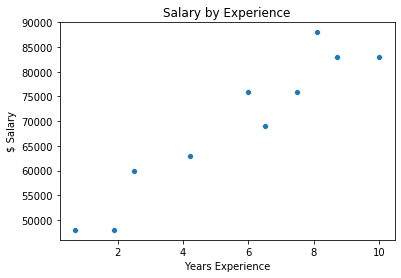

In [130]:
sns.scatterplot(exps, salaries)
plt.xlabel('Years Experience')
plt.ylabel('$ Salary')
plt.title('Salary by Experience')
plt.show()

In [131]:
salary_by_tenure = defaultdict(list)

for salary, tenure in salaries_and_tenures:
    salary_by_tenure[tenure].append(salary)

In [134]:
average_salary_by_tenure = {
    tenure : sum(salary) / len(salary)
    for tenure, salary in salary_by_tenure.items()
}

In [142]:
for key in sorted(average_salary_by_tenure.keys()):
    print("%s: %s" % (key, average_salary_by_tenure[key]))

0.7: 48000.0
1.9: 48000.0
2.5: 60000.0
4.2: 63000.0
6: 76000.0
6.5: 69000.0
7.5: 76000.0
8.1: 88000.0
8.7: 83000.0
10: 83000.0


## Topic Interests

In [143]:
words_and_counts = Counter(word
                           for user, interest in interests
                           for word in interest.lower().split())

for word, count in words_and_counts.most_common():
    if count > 1:
        print(word, count)

big 3
data 3
java 3
python 3
learning 3
hadoop 2
hbase 2
cassandra 2
scikit-learn 2
r 2
statistics 2
regression 2
probability 2
machine 2
neural 2
networks 2
